In [1]:
from viresclient import SwarmRequest
import cdflib
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Fetch some orbital parameters from all spacecraft at 10-minute sampling

Store them in a `DataFrame` with a multi-index (extra index for `Spacecraft`)

In [2]:
dfs = {"A":None, "B":None, "C":None}
for sat in "ABC":
    request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
    request.set_collection(f"SW_OPER_MAG{sat}_LR_1B")
    request.set_products(
         auxiliaries=[
             'OrbitNumber',
             'AscendingNodeTime',
             'AscendingNodeLongitude',
             'SunZenithAngle',
         ],
         sampling_step="PT10M"
    )
    dfs[sat] = request.get_between(
        start_time=dt.datetime(2013, 11, 25),
        end_time=dt.datetime(2019, 1, 1)
    ).as_dataframe()
df = pd.concat(dfs)

[1/1] Processing:  100%|██████████|  [ Elapsed: 07:55, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] (16.638MB)
[1/1] Processing:  100%|██████████|  [ Elapsed: 07:33, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ] (17.271MB)
[1/1] Processing:  100%|██████████|  [ Elapsed: 07:48, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ] (16.637MB)


In [3]:
# Convert AscendingNodeTime from CDF_EPOCH to datetimes
# CDF_EPOCH is number of ms from year 0
CDF_EPOCH_UNIX_TIME_OFFSET = cdflib.cdfepoch.compute_epoch([1970,1,1,0,0,0,0],)  # returns 62167219200000.0
df["AscendingNodeTime_dt"] = pd.to_datetime(
    df["AscendingNodeTime"] - CDF_EPOCH_UNIX_TIME_OFFSET,
    unit="ms"
)

### Calculate Local Time of Ascending Node (LTAN) from AN time and AN longitude

In [4]:
def calc_LTAN(UThour=None, longitude=None):
    return (UThour - (360-longitude%360)/15)%24

df["LTAN"] = calc_LTAN(
    UThour= df["AscendingNodeTime_dt"].dt.hour + df["AscendingNodeTime_dt"].dt.minute/60,
    longitude=df["AscendingNodeLongitude"]
)

df.head()

Spacecraft   Latitude   Longitude      Radius  \
  Timestamp                                                           
A 2013-11-25 11:02:52          A  72.350396   55.790136  6861649.17   
  2013-11-25 11:12:52          A  69.156792 -140.894660  6862407.29   
  2013-11-25 11:22:52          A  31.103680 -138.432339  6870020.23   
  2013-11-25 11:32:52          A  -6.946441 -139.164490  6879112.19   
  2013-11-25 11:42:52          A -44.896543 -139.530272  6884912.13   

                       OrbitNumber  AscendingNodeTime  AscendingNodeLongitude  \
  Timestamp                                                                     
A 2013-11-25 11:02:52           45       6.355260e+13                  52.834   
  2013-11-25 11:12:52           45       6.355260e+13                  52.834   
  2013-11-25 11:22:52           45       6.355260e+13                  52.834   
  2013-11-25 11:32:52           45       6.355260e+13                  52.834   
  2013-11-25 11:42:52           45       6.355260e+13                  52.834   

                       SunZenithAngle          AscendingNodeTime_dt       LTAN  
  Timestamp                                                                     
A 2013-11-25 11:02:52       97.902527 2013-11-25 10:43:51.545960938  14.238933  
  2013-11-25 11:12:52      128.211798 2013-11-25 10:43:51.545960938  14.238933  
  2013-11-25 11:22:52      146.610289 2013-11-25 10:43:51.545960938  14.238933  
  2013-11-25 11:32:52      134.036001 2013-11-25 10:43:51.545960938  14.238933  
  2013-11-25 11:42:52      105.100529 2013-11-25 10:43:51.545960938  14.238933

# Plot for Swarm A

In [5]:
df.loc["A"].head()

,Spacecraft,Latitude,Longitude,Radius,OrbitNumber,AscendingNodeTime,AscendingNodeLongitude,SunZenithAngle,AscendingNodeTime_dt,LTAN
Timestamp,,,,,,,,,,
2013-11-25 11:02:52,A,72.350396,55.790136,6861649.17,45,6.355260e+13,52.834,97.902527,2013-11-25 10:43:51.545960938,14.238933
2013-11-25 11:12:52,A,69.156792,-140.894660,6862407.29,45,6.355260e+13,52.834,128.211798,2013-11-25 10:43:51.545960938,14.238933
2013-11-25 11:22:52,A,31.103680,-138.432339,6870020.23,45,6.355260e+13,52.834,146.610289,2013-11-25 10:43:51.545960938,14.238933
2013-11-25 11:32:52,A,-6.946441,-139.164490,6879112.19,45,6.355260e+13,52.834,134.036001,2013-11-25 10:43:51.545960938,14.238933
2013-11-25 11:42:52,A,-44.896543,-139.530272,6884912.13,45,6.355260e+13,52.834,105.100529,2013-11-25 10:43:51.545960938,14.238933


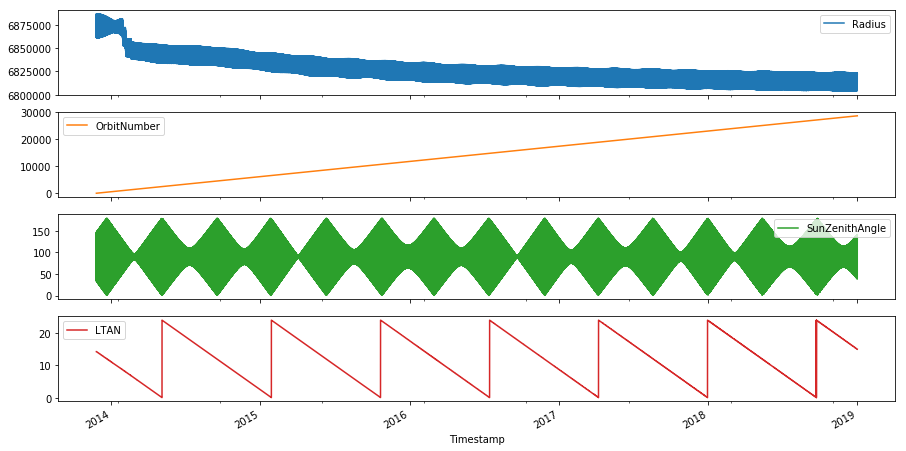

In [6]:
df.loc["A"].plot(y=["Radius", "OrbitNumber", "SunZenithAngle", "LTAN"], subplots=True, figsize=(15,8));

# Plot Altitude and LTAN for A, B, & C

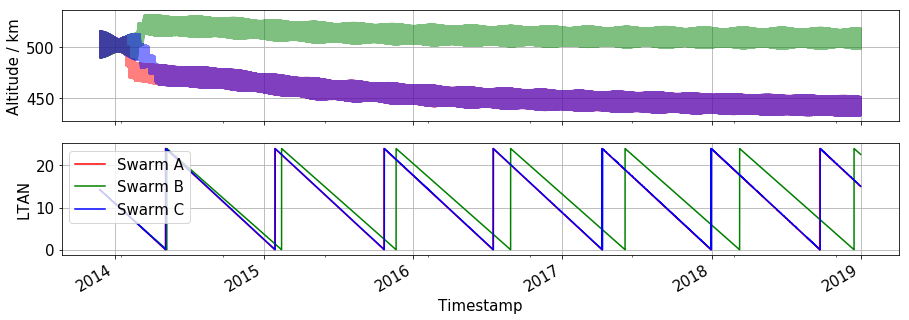

In [7]:
plt.rcParams["font.size"] = 15

df["Altitude"] = df["Radius"]/1e3 - 6371.2
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5), sharex=True)
for sat, color in zip("ABC", ["red", "green", "blue"]):
    df.loc[sat].plot(y="Altitude", ax=axes[0], color=color, alpha=0.5, legend=None)
    df.loc[sat].plot(y="LTAN", ax=axes[1], color=color, alpha=1, label=f"Swarm {sat}")
axes[0].set_ylabel("Altitude / km");
axes[1].set_ylabel("LTAN");
for ax in axes:
    ax.grid()

# Just fetch the times at the beginning of orbits

This requires making many individual requests, which is slow and difficult. It would be quicker to get these directly from the original orbit counter files at https://swarm-diss.eo.esa.int/#swarm%2FLevel1b%2FLatest_baselines%2FORBCNT

However, this suggests the utility of a possible new WPS process which can fetch data at a set of individual times rather than a range.

In [8]:
from tqdm import tqdm

def get_AN_times():
    request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
    ANtimes = {"A":[], "B":[], "C":[]}
    for sat in "ABC":
    #     orbnos = df.loc[sat]["OrbitNumber"]
    #     for orbno in tqdm(range(orbnos[0], orbnos[-1] + 1, 100):
        for orbno in tqdm(range(1, 28000, 100)):
            ANtimes[sat].append(
                request.get_times_for_orbits(sat, orbno, orbno)[0]
            )
    ANtimes_dfs = {}
    for sat in ("ABC"):
        ANtimes_dfs[sat] = pd.DataFrame(index=ANtimes[sat])
        ANtimes_dfs[sat].index.name = "Timestamp"
        ANtimes_dfs[sat].index = ANtimes_dfs[sat].index.round("1s")
        ANtimes_dfs[sat]["ANtime"] = ANtimes_dfs[sat].index
    ANtimes_df = pd.concat(ANtimes_dfs)
    return ANtimes_df

ANtimes_df = get_AN_times()
ANtimes_df.head()

100%|██████████| 280/280 [00:50<00:00,  5.58it/s]


ANtime
  Timestamp                              
A 2013-11-22 13:21:47 2013-11-22 13:21:47
  2013-11-29 03:00:59 2013-11-29 03:00:59
  2013-12-05 16:39:57 2013-12-05 16:39:57
  2013-12-12 06:18:37 2013-12-12 06:18:37
  2013-12-18 19:56:53 2013-12-18 19:56:53

#### Fetch the ANLon at those times

In [9]:
def dt64_to_dt(dt64):
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, 's')
    return dt.datetime.utcfromtimestamp(ts)

def get_AN_lons(ANtimes_df):
    ANlon_dfs = {"A":None, "B":None, "C":None}
    for sat in "ABC":
        request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
        request.set_collection(f"SW_OPER_MAG{sat}_LR_1B")
        request.set_products(
            auxiliaries=["AscendingNodeLongitude"]
        )
        ANlon_dfs[sat] = pd.DataFrame()
        for t in tqdm(ANtimes_df.loc[sat].values):
            t0 = dt64_to_dt(t + np.timedelta64(1, "s"))
            t1 = t0 + dt.timedelta(seconds=1)
            ANlon = request.get_between(
                t0, t1,
                asynchronous=False, show_progress=False
            ).as_dataframe()["AscendingNodeLongitude"]
            ANlon.index
            ANlon_dfs[sat] = pd.concat([ANlon_dfs[sat], ANlon])
        ANlon_dfs[sat].columns = ["ANlon"]
        ANlon_dfs[sat].index.name = "Timestamp"
        ANlon_dfs[sat].index = ANlon_dfs[sat].index - dt.timedelta(seconds=1)
    ANlon_df = pd.concat(ANlon_dfs)
    return ANlon_df

ANlon_df = get_AN_lons(ANtimes_df)
AN_df = ANlon_df.join(ANtimes_df)
AN_df.head()

100%|██████████| 280/280 [02:14<00:00,  2.71it/s]


ANlon              ANtime
  Timestamp                                       
A 2013-11-29 03:00:59  163.725 2013-11-29 03:00:59
  2013-12-05 16:39:57  -49.638 2013-12-05 16:39:57
  2013-12-12 06:18:37   97.077 2013-12-12 06:18:37
  2013-12-18 19:56:53 -116.109 2013-12-18 19:56:53
  2013-12-25 09:34:47   30.794 2013-12-25 09:34:47

In [10]:
AN_df["LTAN"] = calc_LTAN(
    UThour=AN_df["ANtime"].dt.hour + AN_df["ANtime"].dt.minute/60,
    longitude=AN_df["ANlon"]
)
AN_df.head()

ANlon              ANtime       LTAN
  Timestamp                                                  
A 2013-11-29 03:00:59  163.725 2013-11-29 03:00:59  13.915000
  2013-12-05 16:39:57  -49.638 2013-12-05 16:39:57  13.340800
  2013-12-12 06:18:37   97.077 2013-12-12 06:18:37  12.771800
  2013-12-18 19:56:53 -116.109 2013-12-18 19:56:53  12.192733
  2013-12-25 09:34:47   30.794 2013-12-25 09:34:47  11.619600

# Plot Altitude and LTAN again

(Using altitude from the first download)

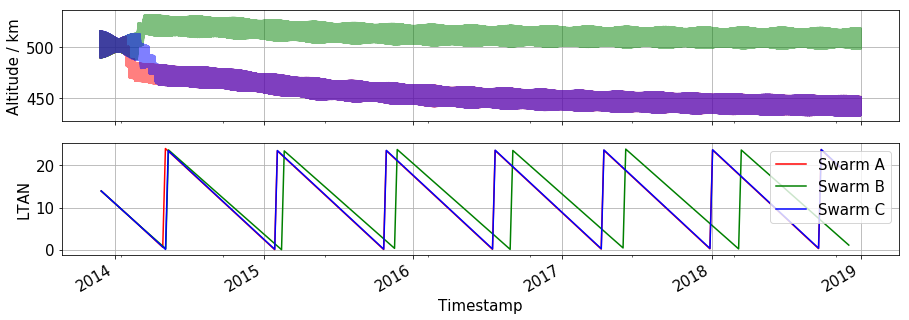

In [11]:
plt.rcParams["font.size"] = 15

df["Altitude"] = df["Radius"]/1e3 - 6371.2
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5), sharex=True)
for sat, color in zip("ABC", ["red", "green", "blue"]):
    df.loc[sat].plot(y="Altitude", ax=axes[0], color=color, alpha=0.5, legend=None)
    AN_df.loc[sat].plot(y="LTAN", ax=axes[1], color=color, alpha=1, label=f"Swarm {sat}")
axes[0].set_ylabel("Altitude / km");
axes[1].set_ylabel("LTAN");
for ax in axes:
    ax.grid()